In [10]:
#useful commands for plotting
#Modules to import
import os
import subprocess
import numpy as np
from scipy import interpolate, integrate
import natpy as nat
import matplotlib.pyplot as plt
import camb
%config InlineBackend.figure_format = 'svg' #This backend works magically clear plots
#%config InlineBackend.figure_format = 'png' #But to show on github I need to use png - 
                                            #or keep svg and use the publicnbconverter
#For \text command
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['figure.dpi']= 72.0 #For svg
#plt.rcParams['figure.dpi']= 216.0 #For svg
plt.rcParams['lines.linewidth'] = 2.3
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.family"] = "cmr10"
plt.rcParams["font.size"] = 16
plt.rcParams["axes.xmargin"] = 0
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.facecolor'] = (1,1,1,0) #For transparent plot background
plt.rcParams["grid.color"] = "#dddddd"
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "none"
from num2tex import num2tex

In [11]:
#Set up parent directory to be whereever the notebook is being run
import os
parent_path=str(os.getcwd())

In [12]:
#Dimensionless hubble from the params.ini file
h = 67.31/100.00

#Pre-set the parameters I might not need to modify for this cell - mind the order
#l_max_scalar = 2550
transfer_k_per_logint = 100
l_max_scalar = 5000

#THE FOLLOWING ARE THE RANGES OF VARIABLES THAT ARE ACTUALLY VARYING.
#We can make a smaller list to check if it works first
get_scalar_cls_list = ['T', 'F']  # #use string here to put in the call command
axfrac_list = ['1.e-3', '0.1', '0.5', '1.0']  # use string here to put in the call command
axfrac_label_list_temp = [axfrac_item.replace('.e', 'e') for axfrac_item in axfrac_list]
axfrac_label_list = [axfrac_item.replace('.', 'd') for axfrac_item in axfrac_label_list_temp]
m_ax_list = [1.e-22, 1.e-24, 1.e-26, 1.e-28]
m_ax_label_list = [str(m_ax).replace('.', 'd') for m_ax in m_ax_list]
kmax_list = [3, 1, 0.3, 0.1]


 





In [8]:
# Generate data
for get_scalar_cls in get_scalar_cls_list:
    for axfrac in axfrac_list:
        axfrac_label = axfrac_label_list[axfrac_list.index(axfrac)]
        for k, m_ax_label in enumerate(m_ax_label_list):
            print(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}')
            subprocess.call(f'./camb params.ini 1 {get_scalar_cls} 2 {l_max_scalar} 3 {transfer_k_per_logint} 4 {kmax_list[k]/h} 5 {m_ax_list[k]} 6 {axfrac}', shell=True)

            if get_scalar_cls == 'T':
                # Move scalar_cls files
                subprocess.call(f'mv test_scalCls.dat postdebug_scalCls_max={m_ax_label}eV_axfrac={axfrac_label}.dat', shell=True)

./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-22 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)
Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb

Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-22 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-22 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 4.456990046055564 5 1e-22 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 T 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-22 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 1.e-3
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-22 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 0.1
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-22 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 0.5
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 4.456990046055564 5 1e-22 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 1.4856633486851878 5 1e-24 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.44569900460555634 5 1e-26 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    
./camb params.ini 1 F 2 5000 3 100 4 0.1485663348685188 5 1e-28 6 1.0
(w0, wa) = (-1.00000,  0.00000)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


Reion redshift       =   9.941
Om_b h^2             =  0.022220
Om_c h^2             =  0.117810
Om_nu h^2            =  0.000600
Om_Lambda            =  0.686896
H0                  = 67.310000
Om_ax h^2            =  0.001190
a_osc               =  0.53E-08
ma/eV            =  0.10E-17
Om_K                 = -0.000000
Om_m (1-Om_K-Om_L)   =  0.313104
100 theta (CosmoMC)  =  1.040384
N_eff (total)        =  3.040000
 1 nu, g= 1.0133 m_nu*c^2/k_B/T_nu0=    332.50 (m_nu=  0.056 eV)
Reion opt depth      =  0.0780
Age of universe/GYr  =  13.834
zstar                =  1089.99
r_s(zstar)/Mpc       =  144.85
100*theta            =  1.040526
zdrag                =  1059.55
r_s(zdrag)/Mpc       =  147.57
k_D(zstar) Mpc       =  0.1405
100*theta_D          =  0.160622
tau_recomb/Mpc       =  281.28  tau_now/Mpc =  14202.4
 at z =    0.00000000      sigma8 (all matter)=  0.828069091    


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


/tmp/ipykernel_97120/3744801722.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)


NameError: name 'ls' is not defined

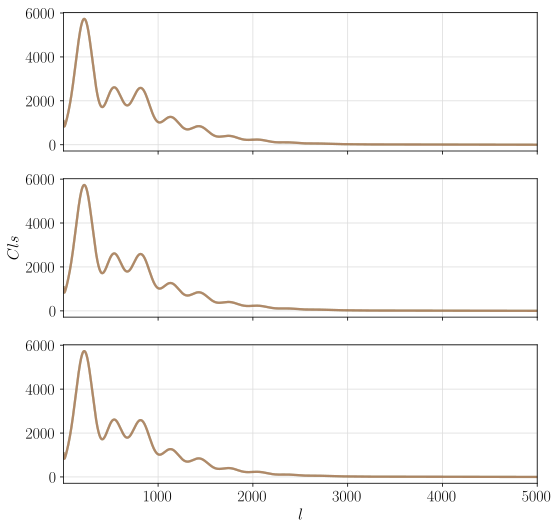

In [9]:
import matplotlib.pyplot as plt

# Variables y configuraciones previas
# ...

fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)
#colors = ['orange', 'white', 'grey', 'cyan'] 


for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')

    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros TT después de la depuración
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)

        # Graficar los espectros TT
        axs[i].plot(l_after, TT_after, label='TT', alpha=0.3)
        
        
# Ajustar etiquetas y leyendas en el último subplot
axs[2].set_xlabel('$l$')
axs[1].set_ylabel('$Cls$')

axs[0].plot(ls,TT_camb, '--', color='C2', label='TT LCDM')
axs[1].plot(ls,TT_camb, '--', color='C2', label='TT LCDM')
axs[2].plot(ls,TT_camb, '--', color='C2', label='TT LCDM')

plt.legend(fontsize = 10, loc = 'upper right', fancybox=True)       
plt.suptitle('CMB power spectrum TT ')

# Ajustar etiquetas y leyendas
# ...

# Mostrar el gráfic

plt.show()
plt.close()


/tmp/ipykernel_82143/569459328.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)


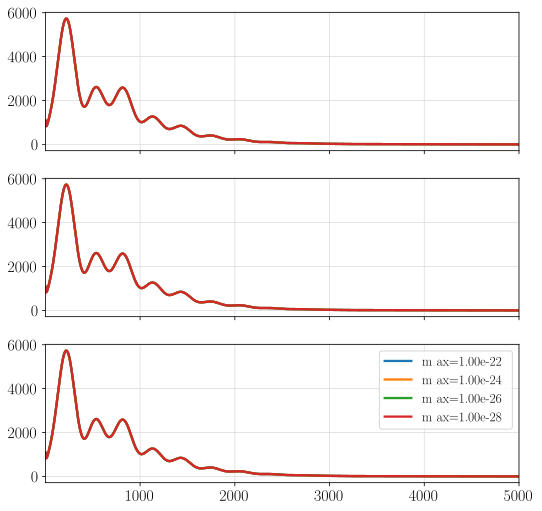

In [13]:
#mostrando ahora las masas del axion


import matplotlib.pyplot as plt

# Variables y configuraciones previas
# ...

fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')


    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        
        # Graficar los espectros 
        if i < 2:
            axs[i].plot(l_after, TT_after)
        else:
            # Graficar el espectro con la etiqueta correspondiente al valor de la masa del axión en el último subplot
            axs[i].plot(l_after, TT_after, label=f'm_ax={m_ax_list[j]:.2e}')
            
            # Establecer escala logarítmica en el eje y
            # axs[i].set_yscale('log')

# Ajustar etiquetas y leyendas en el último subplot
# ...

#axs.set_title('TT')

#graficos para las diferencias fraccionales


# Mostrar el gráfico
plt.legend(fontsize='small', loc='upper right')
plt.show()
plt.close()




# Espectro de potencia LCDM

In [8]:
#Cls LCDM 
import camb
from camb import model, initialpower
import numpy as np

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(4949, lens_potential_accuracy=0);

In [9]:
#calculate results for these parameters
results = camb.get_results(pars)

In [10]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


/tmp/ipykernel_82143/3256540711.py:10: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


4951

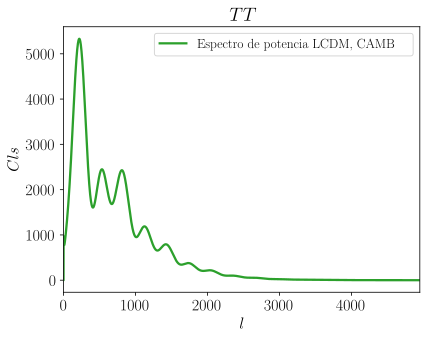

In [11]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
#print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
#ls =np.arange(1,4999)
TT_camb = unlensedCL[:,0]
fig, ax = plt.subplots()
ax.plot(ls,TT_camb, color='C2', label='Espectro de potencia LCDM, CAMB')
ax.set_title('$TT$')
ax.set_xlabel('$l$')
ax.set_ylabel('$Cls$')
plt.legend(fontsize='small', loc='upper right')
#plt.legend()
len(TT_camb)


/tmp/ipykernel_82143/636245703.py:12: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)


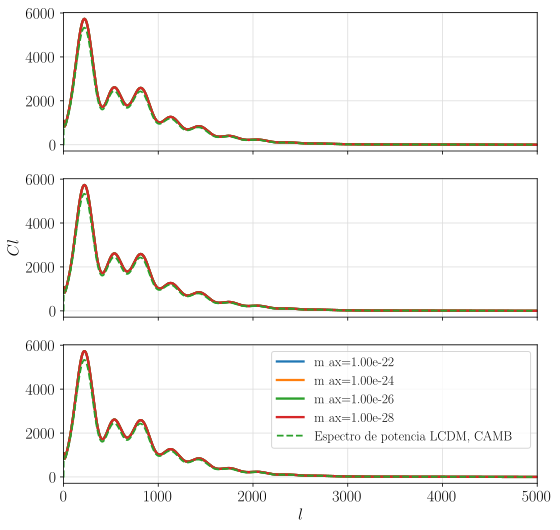

In [35]:
#PS axionCAMB LCDM CAMB


#mostrando ahora las masas del axion


import matplotlib.pyplot as plt

# Variables y configuraciones previas
# ...

fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')


    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        
        # Graficar los espectros 
        if i < 2:
            axs[i].plot(l_after, TT_after)
        else:
            # Graficar el espectro con la etiqueta correspondiente al valor de la masa del axión en el último subplot
            axs[i].plot(l_after, TT_after, label=f'm_ax={m_ax_list[j]:.2e}')
            
        
            
            # Establecer escala logarítmica en el eje y
            # axs[i].set_yscale('log')
            
# + LCDM CAMB 

    axs[i].plot(ls,TT_camb, '--', color='C2', lw=1.8, label='Espectro de potencia LCDM, CAMB')
# Ajustar etiquetas y leyendas en el último subplot
# ...

axs[i].set_xlabel('$l$')
axs[1].set_ylabel('$Cl$')




# Mostrar el gráfico
plt.legend(fontsize='small', loc='upper right')
plt.show()
plt.close()


### Diferencia fraccional

In [42]:
min_length = min(len(TT_after), len(TT_camb))
TT_after_min = TT_after[:min_length]
TT_camb_min = TT_camb[:min_length]

ls_min = np.arange(min_length)




/tmp/ipykernel_82143/1036892485.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)
/tmp/ipykernel_82143/1036892485.py:23: RuntimeWarning: divide by zero encountered in divide
  fractional_difference = (TT_after_min - TT_camb_min) / TT_camb_min


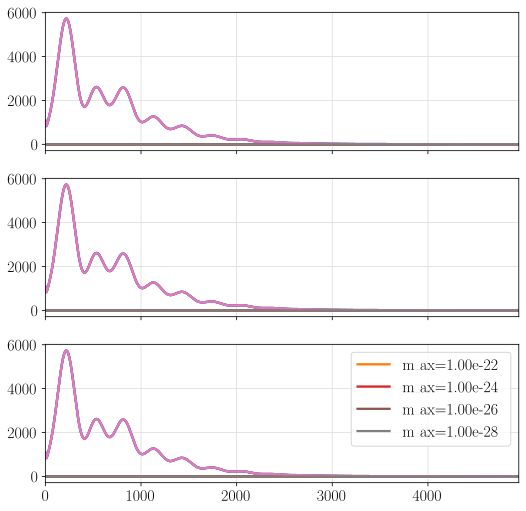

In [50]:
fig, axs = plt.subplots(3, 1, figsize=(8.5, 8.5), sharex=True)

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')

    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        #asegurar ls longitudes entre los arrays
        
        min_length = min(len(TT_after), len(TT_camb))
        ls_min = np.arange(min_length)
        TT_after_min = TT_after[:min_length]
        TT_camb_min = TT_camb[:min_length]
        # Calcular la diferencia fraccional entre los espectros TT de AxionCAMB y CAMB
        fractional_difference = (TT_after_min - TT_camb_min) / TT_camb_min
        
        # Graficar los espectros y la diferencia fraccional en el mismo subplot
        axs[i].plot(ls_min, TT_after_min)
        axs[i].plot(ls_min, fractional_difference, label=f'm_ax={m_ax_list[j]:.2e}')


# Mostrar el gráfico
plt.legend()
plt.show()
plt.close()
        

/tmp/ipykernel_82143/1373724222.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(6, 1, figsize=(8.5, 15), sharex=True)
/tmp/ipykernel_82143/1373724222.py:24: RuntimeWarning: divide by zero encountered in divide
  fractional_difference = (TT_after_min - TT_camb_min) / TT_camb_min


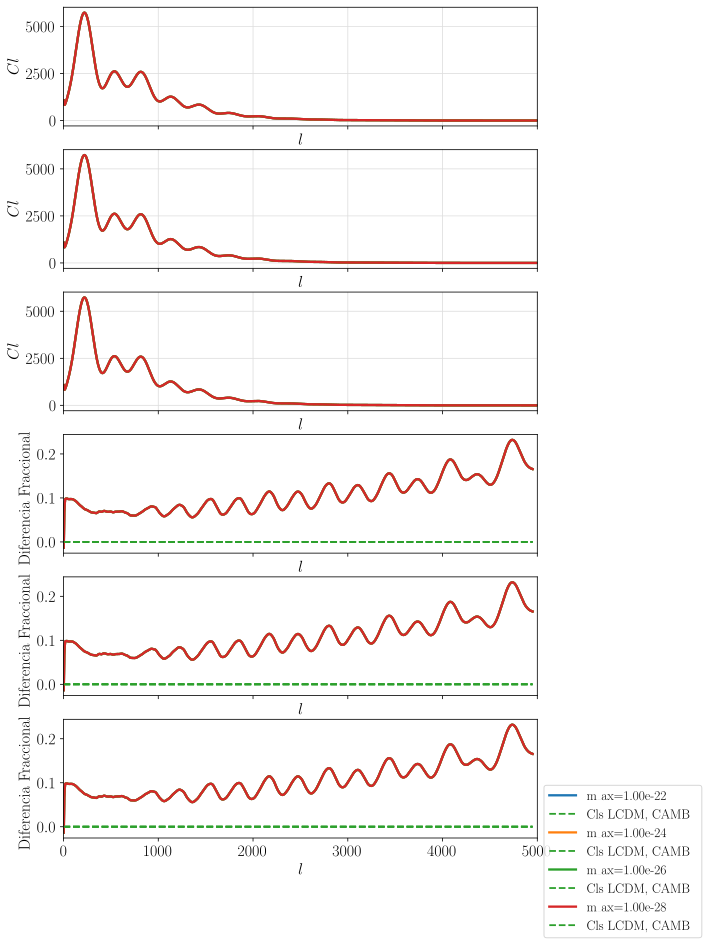

In [93]:
fig, axs = plt.subplots(6, 1, figsize=(8.5, 15), sharex=True)

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')

    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        
         #asegurar ls longitudes entre los arrays
        
        min_length = min(len(TT_after), len(TT_camb))
        ls_min = np.arange(min_length)
        TT_after_min = TT_after[:min_length]
        TT_camb_min = TT_camb[:min_length]
        # Calcular la diferencia fraccional entre los espectros TT de AxionCAMB y CAMB
        fractional_difference = (TT_after_min - TT_camb_min) / TT_camb_min
        
        # Graficar los espectros en un subplot separado
        ax = axs[i]
        ax.plot(l_after, TT_after)
        ax.set_xlabel('$l$')
        ax.set_ylabel('$Cl$')
        
         # Graficar la diferencia fraccional en otro subplot separado
        ax_diff = axs[i + len(axfrac_list) - 1]
        ax_diff.plot(ls_min, fractional_difference, label=f'm_ax={m_ax_list[j]:.2e}')
        ax_diff.set_xlabel('$l$')
        ax_diff.set_ylabel('Diferencia Fraccional')
        
        # Graficar el espectro de potencia LCDM, CAMB
        ax_diff.plot(ls[:min_length], [0] * min_length, '--', color='C2', lw=1.8, label='Cls LCDM, CAMB')
        
        if i == len(axfrac_list) - 2 and j == len(m_ax_list) - 1:
            ax_diff.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1, 0.5))


# Mostrar los gráficos
#plt.tight_layout()
plt.show()
plt.close()

/tmp/ipykernel_82143/1433365331.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(len(axfrac_list) - 1, 1, figsize=(8.5, 8.5), sharex=True)
/tmp/ipykernel_82143/1433365331.py:23: RuntimeWarning: divide by zero encountered in divide
  fractional_difference = (TT_after_min - TT_camb_min) / TT_camb_min


Valores de diferencia fraccional para axfrac=1.e-3 y m_ax=1e-22:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valores de diferencia fraccional para axfrac=1.e-3 y m_ax=1e-24:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valores de diferencia fraccional para axfrac=1.e-3 y m_ax=1e-26:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valores de diferencia fraccional para axfrac=1.e-3 y m_ax=1e-28:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valores de diferencia fraccional para axfrac=0.1 y m_ax=1e-22:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valores de diferencia fraccional para axfrac=0.1 y m_ax=1e-24:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valores de diferencia fraccional para axfrac=0.1 y m_ax=1e-26:
[        inf         inf -0.01331649 ...  0.16579285  0.1657109
  0.16562527]
Valor

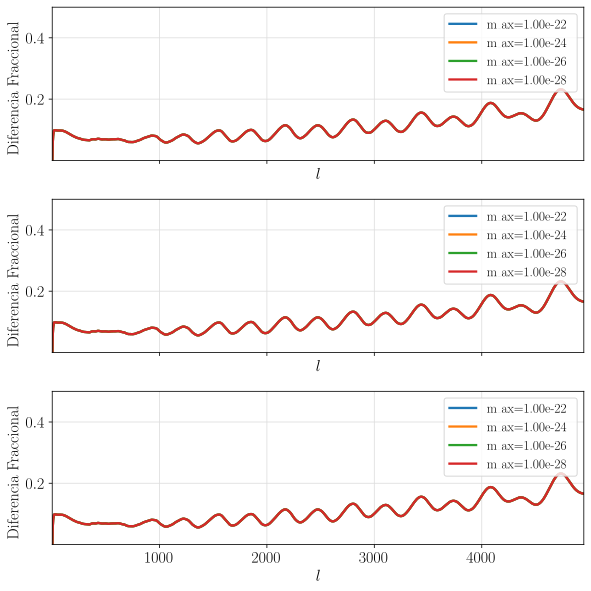

In [104]:
fig, axs = plt.subplots(len(axfrac_list) - 1, 1, figsize=(8.5, 8.5), sharex=True)

for i in range(len(axfrac_list) - 1):
    axfrac = axfrac_list[i]
    axfrac_label = axfrac_label_list[i]
    
    axs[i].grid(which='both')

    for j in range(len(m_ax_list)):
        m_ax_label = m_ax_label_list[j]

        # Cargar los datos de los espectros
        l_after, TT_after = np.loadtxt('postdebug_scalCls_max=%seV_axfrac=%s.dat' % (m_ax_label, axfrac_label),
                                       usecols=(0, 1), unpack=True)
        
        #asegurar las longitudes entre los arrays
        min_length = min(len(TT_after), len(TT_camb))
        ls_min = np.arange(min_length)
        TT_after_min = TT_after[:min_length]
        TT_camb_min = TT_camb[:min_length]
        
        # Calcular la diferencia fraccional entre los espectros de AxionCAMB y CAMB
        fractional_difference = (TT_after_min - TT_camb_min) / TT_camb_min
        
        print(f"Valores de diferencia fraccional para axfrac={axfrac} y m_ax={m_ax_list[j]}:")
        print(fractional_difference)
        
        # Graficar la diferencia fraccional
        axs[i].plot(ls_min, fractional_difference, label=f'm_ax={m_ax_list[j]:.2e}')
        
        axs[i].set_xlabel('$l$')
        axs[i].set_ylabel('Diferencia Fraccional')
        axs[0].set_ylim([1.e-6,5.e-1])
        axs[1].set_ylim([1.e-6,5.e-1])
        axs[2].set_ylim([1.e-6,5.e-1])
        
    axs[i].legend(fontsize='small', loc='upper right')
    
    

# Mostrar los gráficos
plt.tight_layout()
plt.show()
plt.close()

In [154]:
min_length = min(len(TT_after), len(TT_camb))


dif_frac = (TT_after[:min_length] - TT_camb[:min_length]) / TT_after[:min_length]

In [155]:


print(dif_frac)
len(dif_frac)

[ 1.          1.         -0.01349621 ...  0.14221468  0.14215437
  0.14209135]


4951

/tmp/ipykernel_71888/2287532159.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.xlim(10e-20, 10e1)


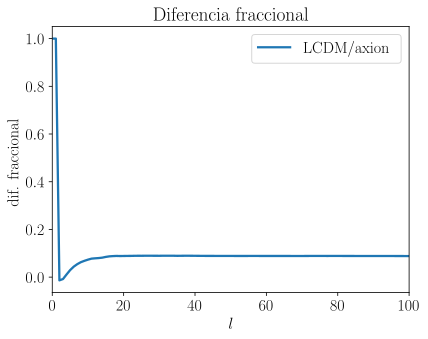

In [156]:
plt.xlim(10e-20, 10e1)
#plt.ylim(0, 10e)

plt.xlabel('$l$')
plt.ylabel('dif. fraccional')
plt.title('Diferencia fraccional')

plt.plot(ls, dif_frac, label='LCDM/axion')

plt.legend()

In [ ]:
results = camb.get_results(params)
powers = results.get_cmb_power_spectra(params, CMB_unit='muK')

TT_lcdm = powers['total'][:, 0]
#l_lcdm = np.arange(len(TT_lcdm))
l_lcdm = 5000
len(TT_lcdm)

2401